<a href="https://colab.research.google.com/github/pragyapragati/temp/blob/master/cartoon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from google.colab import files

In [29]:
uploaded = files.upload()

Saving dc-wikia-data.csv to dc-wikia-data (1).csv


In [30]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "dc-wikia-data.csv" with length 1105600 bytes


In [31]:
uploaded

{'dc-wikia-data.csv': b'page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR\r1422,Batman (Bruce Wayne),\\/wiki\\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,,Living Characters,3093,"1939, May",1939\r23387,Superman (Clark Kent),\\/wiki\\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,,Living Characters,2496,"1986, October",1986\r1458,Green Lantern (Hal Jordan),\\/wiki\\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,,Living Characters,1565,"1959, October",1959\r1659,James Gordon (New Earth),\\/wiki\\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,,Living Characters,1316,"1987, February",1987\r1576,Richard Grayson (New Earth),\\/wiki\\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,,Living Characters,1237,"1940, April",

In [0]:
import io

In [33]:
df1 = pd.read_csv(io.StringIO(uploaded['dc-wikia-data.csv'].decode('utf-8')))
print(df1)

      page_id                             name  \
0        1422             Batman (Bruce Wayne)   
1       23387            Superman (Clark Kent)   
2        1458       Green Lantern (Hal Jordan)   
3        1659         James Gordon (New Earth)   
4        1576      Richard Grayson (New Earth)   
5        1448      Wonder Woman (Diana Prince)   
6        1486           Aquaman (Arthur Curry)   
7        1451        Timothy Drake (New Earth)   
8       71760   Dinah Laurel Lance (New Earth)   
9        1380              Flash (Barry Allen)   
10     403631                       GenderTest   
11       1459           Alan Scott (New Earth)   
12       1905       Barbara Gordon (New Earth)   
13       1386        Jason Garrick (New Earth)   
14      23383            Lois Lane (New Earth)   
15       1456    Alfred Pennyworth (New Earth)   
16       1849          Carter Hall (New Earth)   
17       4320          Kyle Rayner (New Earth)   
18       1706       Raymond Palmer (New Earth)   


In [0]:
fp = open('dc-wikia-data.csv', 'r')

In [35]:
uploaded = files.upload()

Saving marvel-wikia-data.csv to marvel-wikia-data (1).csv


In [36]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "marvel-wikia-data.csv" with length 2406621 bytes


In [37]:
uploaded

{'marvel-wikia-data.csv': b'page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year\r1678,Spider-Man (Peter Parker),\\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,,Living Characters,4043,Aug-62,1962\r7139,Captain America (Steven Rogers),\\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,,Living Characters,3360,Mar-41,1941\r64786,"Wolverine (James \\""Logan\\"" Howlett)",\\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,,Living Characters,3061,Oct-74,1974\r1868,"Iron Man (Anthony \\""Tony\\"" Stark)",\\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,,Living Characters,2961,Mar-63,1963\r2460,Thor (Thor Odinson),\\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,,Living Characters,2258,Nov-50,19

In [0]:
import io

In [39]:
df2 = pd.read_csv(io.StringIO(uploaded['marvel-wikia-data.csv'].decode('utf-8')))
print(df2)

       page_id                                               name  \
0         1678                          Spider-Man (Peter Parker)   
1         7139                    Captain America (Steven Rogers)   
2        64786                Wolverine (James \"Logan\" Howlett)   
3         1868                  Iron Man (Anthony \"Tony\" Stark)   
4         2460                                Thor (Thor Odinson)   
5         2458                         Benjamin Grimm (Earth-616)   
6         2166                          Reed Richards (Earth-616)   
7         1833                         Hulk (Robert Bruce Banner)   
8        29481                          Scott Summers (Earth-616)   
9         1837                         Jonathan Storm (Earth-616)   
10       15725                            Henry McCoy (Earth-616)   
11        1863                            Susan Storm (Earth-616)   
12        7823                         Namor McKenzie (Earth-616)   
13        2614                    

In [0]:
fp = open('marvel-wikia-data.csv', 'r')  

In [0]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [0]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

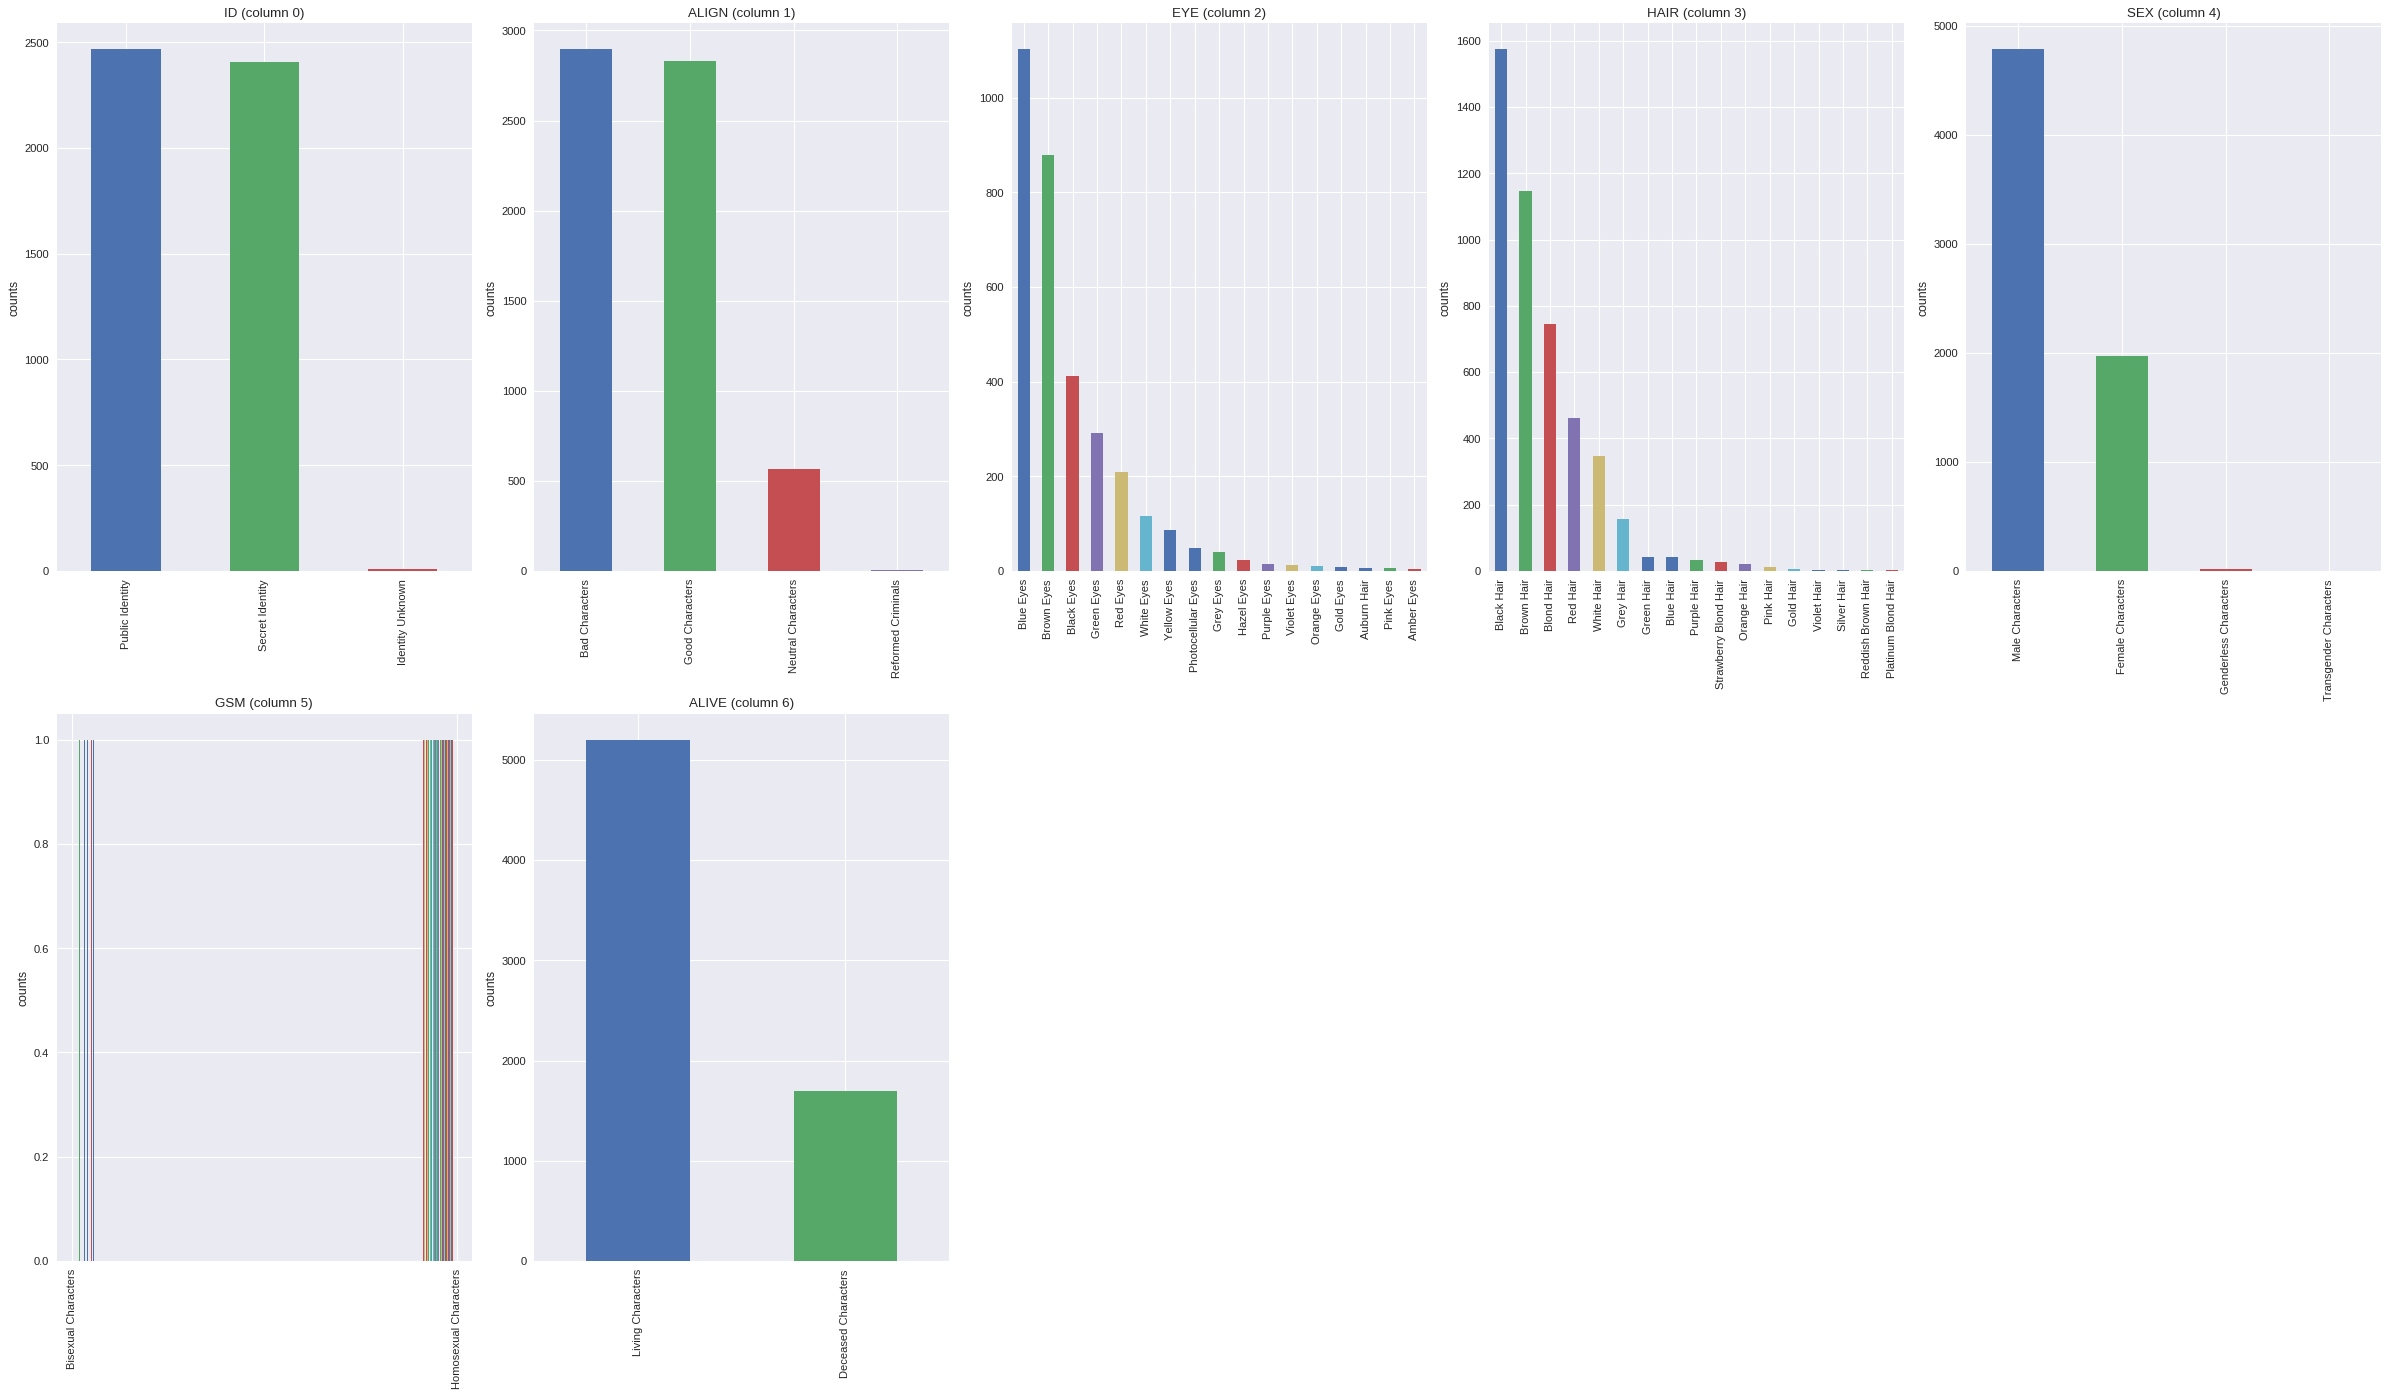

In [45]:
plotPerColumnDistribution(df1, 10, 5)

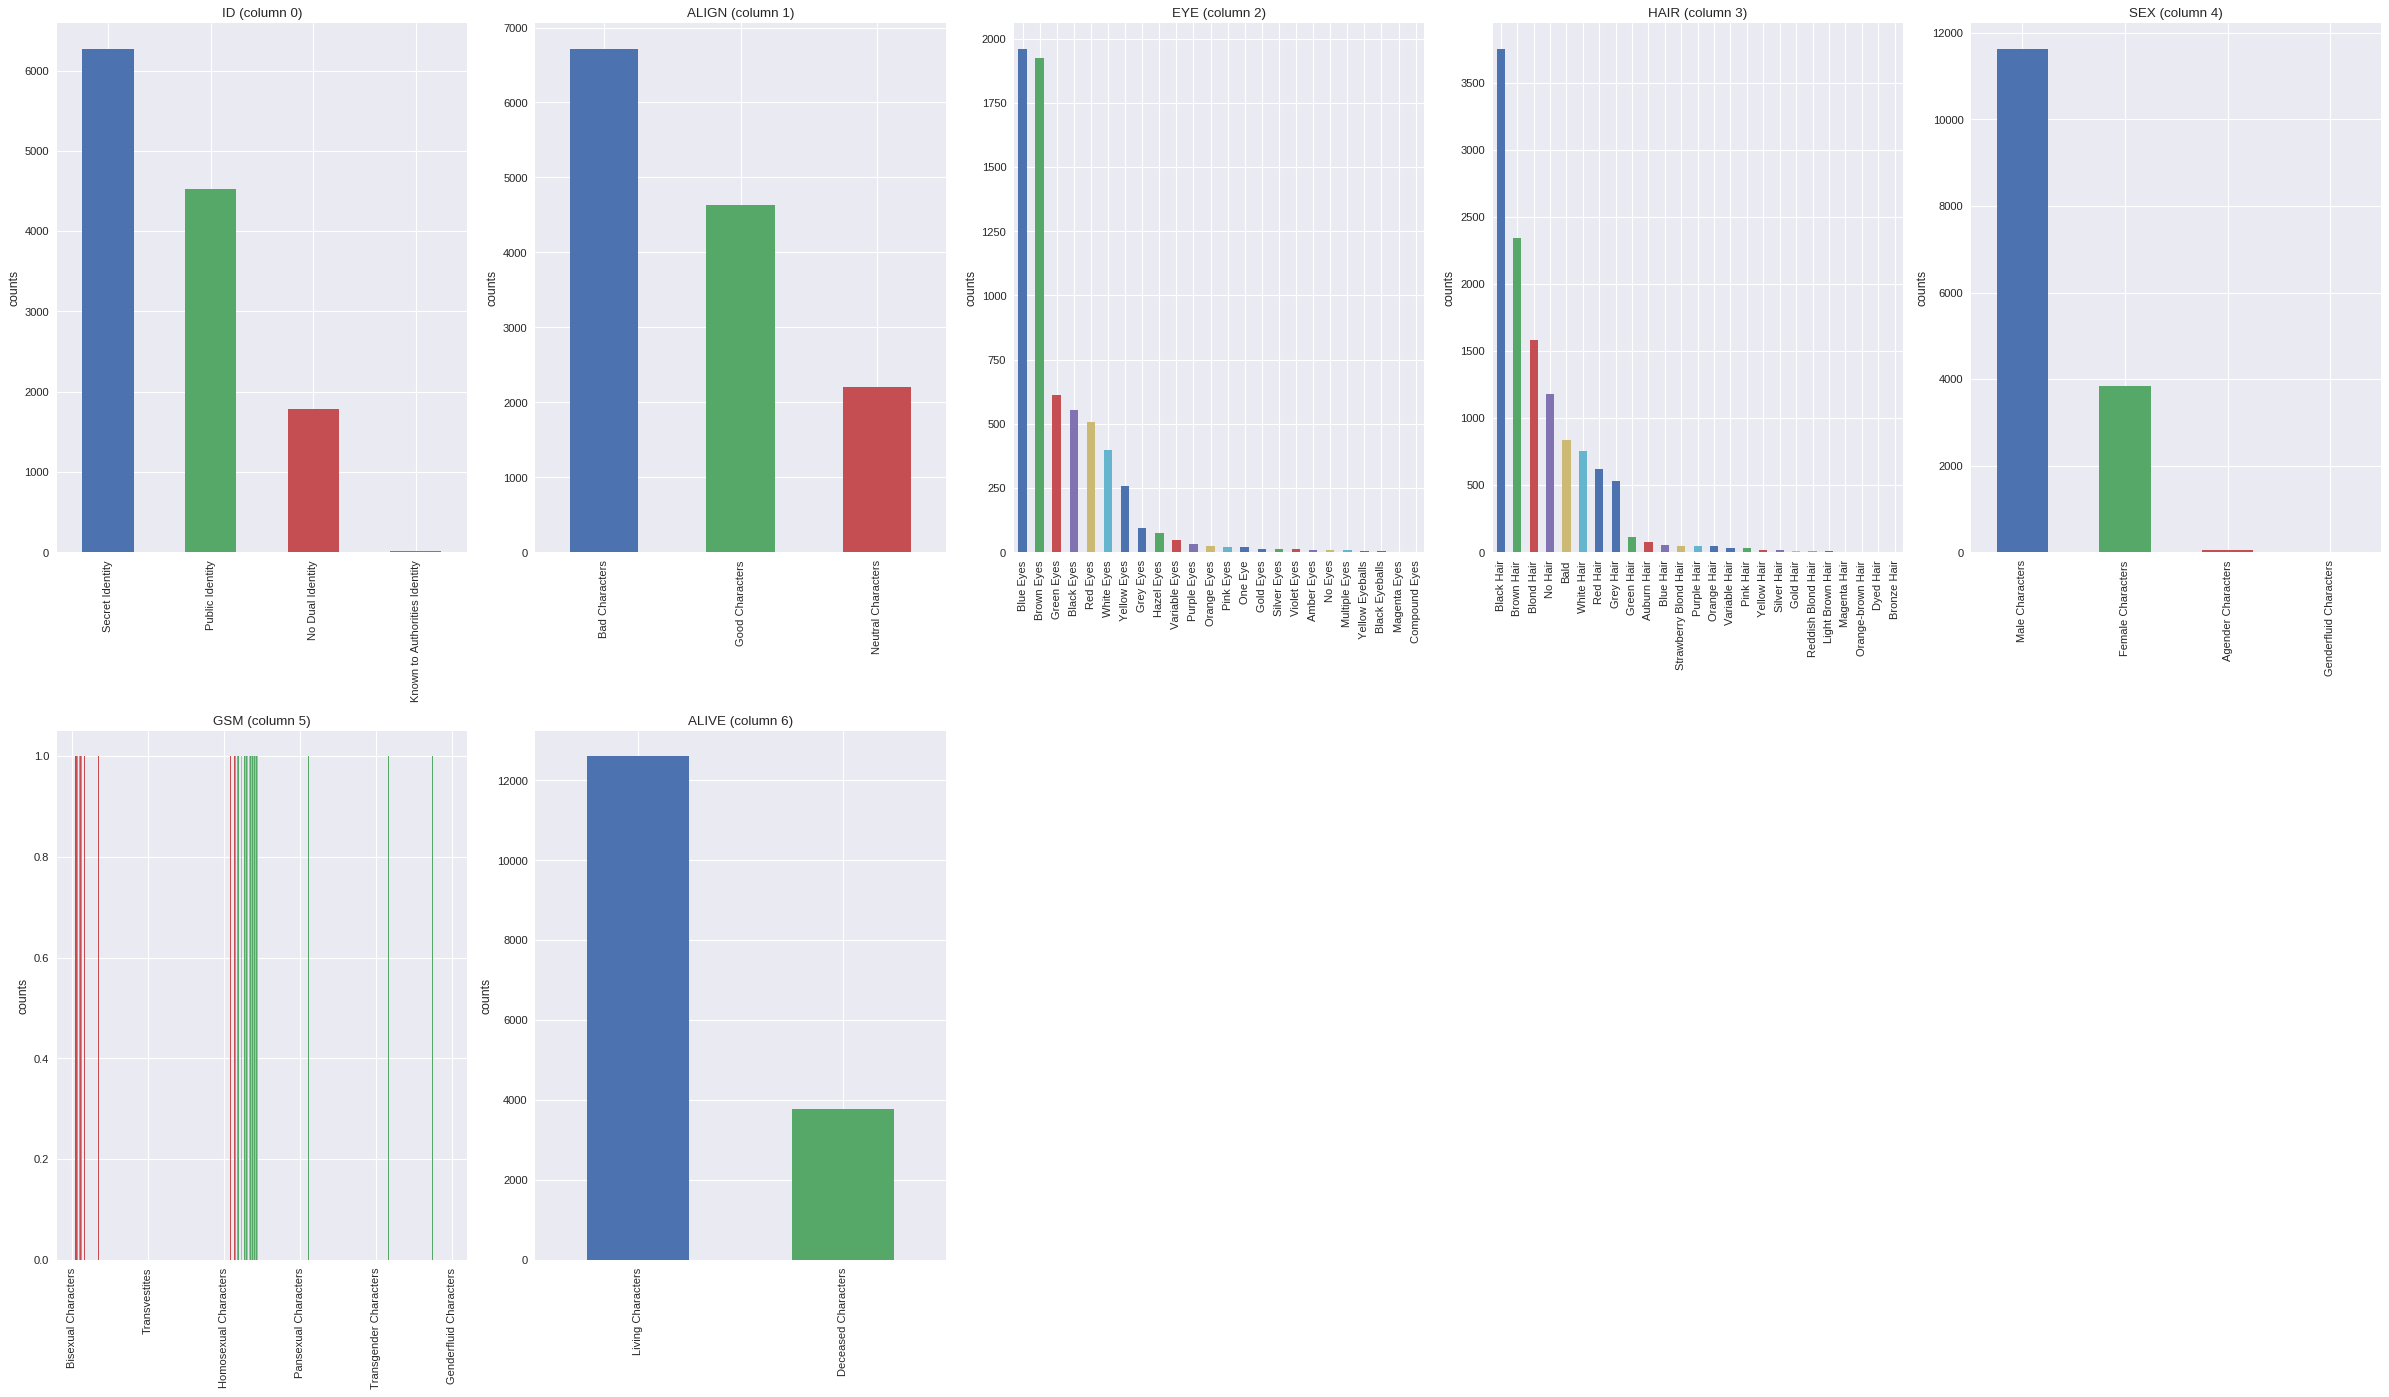

In [52]:
plotPerColumnDistribution(df2, 10, 5)

In [46]:
df1.head(5)

page_id                         name                              urlslug  \
0     1422         Batman (Bruce Wayne)         \/wiki\/Batman_(Bruce_Wayne)   
1    23387        Superman (Clark Kent)        \/wiki\/Superman_(Clark_Kent)   
2     1458   Green Lantern (Hal Jordan)   \/wiki\/Green_Lantern_(Hal_Jordan)   
3     1659     James Gordon (New Earth)     \/wiki\/James_Gordon_(New_Earth)   
4     1576  Richard Grayson (New Earth)  \/wiki\/Richard_Grayson_(New_Earth)   

                ID            ALIGN         EYE        HAIR              SEX  \
0  Secret Identity  Good Characters   Blue Eyes  Black Hair  Male Characters   
1  Secret Identity  Good Characters   Blue Eyes  Black Hair  Male Characters   
2  Secret Identity  Good Characters  Brown Eyes  Brown Hair  Male Characters   
3  Public Identity  Good Characters  Brown Eyes  White Hair  Male Characters   
4  Secret Identity  Good Characters   Blue Eyes  Black Hair  Male Characters   

   GSM              ALIVE  APPEARANCES FIRST APPEARANCE    YEAR  
0  NaN  Living Characters       3093.0        1939, May  1939.0  
1  NaN  Living Characters       2496.0    1986, October  1986.0  
2  NaN  Living Characters       1565.0    1959, October  1959.0  
3  NaN  Living Characters       1316.0   1987, February  1987.0  
4  NaN  Living Characters       1237.0      1940, April  1940.0

In [53]:
df2.head(5)

page_id                                 name  \
0     1678            Spider-Man (Peter Parker)   
1     7139      Captain America (Steven Rogers)   
2    64786  Wolverine (James \"Logan\" Howlett)   
3     1868    Iron Man (Anthony \"Tony\" Stark)   
4     2460                  Thor (Thor Odinson)   

                                   urlslug                ID  \
0              \/Spider-Man_(Peter_Parker)   Secret Identity   
1        \/Captain_America_(Steven_Rogers)   Public Identity   
2  \/Wolverine_(James_%22Logan%22_Howlett)   Public Identity   
3    \/Iron_Man_(Anthony_%22Tony%22_Stark)   Public Identity   
4                    \/Thor_(Thor_Odinson)  No Dual Identity   

                ALIGN         EYE        HAIR              SEX  GSM  \
0     Good Characters  Hazel Eyes  Brown Hair  Male Characters  NaN   
1     Good Characters   Blue Eyes  White Hair  Male Characters  NaN   
2  Neutral Characters   Blue Eyes  Black Hair  Male Characters  NaN   
3     Good Characters   Blue Eyes  Black Hair  Male Characters  NaN   
4     Good Characters   Blue Eyes  Blond Hair  Male Characters  NaN   

               ALIVE  APPEARANCES FIRST APPEARANCE    Year  
0  Living Characters       4043.0           Aug-62  1962.0  
1  Living Characters       3360.0           Mar-41  1941.0  
2  Living Characters       3061.0           Oct-74  1974.0  
3  Living Characters       2961.0           Mar-63  1963.0  
4  Living Characters       2258.0           Nov-50  1950.0

In [0]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

NameError: ignored

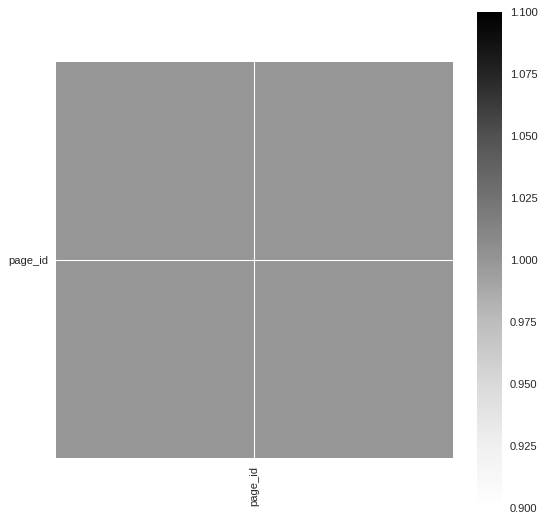

In [49]:
plotCorrelationMatrix(df1, 8)

NameError: ignored

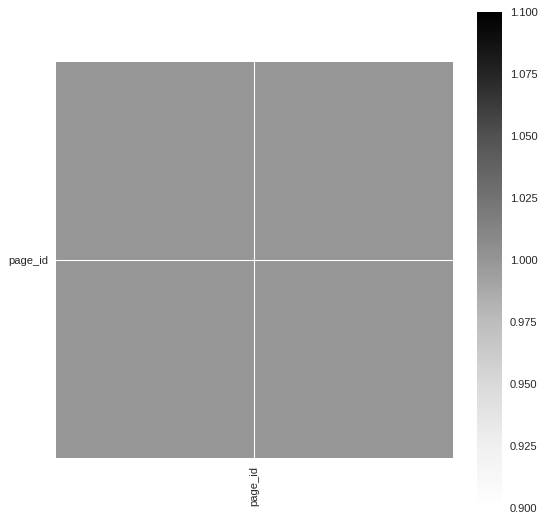

In [54]:
plotCorrelationMatrix(df1, 8)

In [0]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

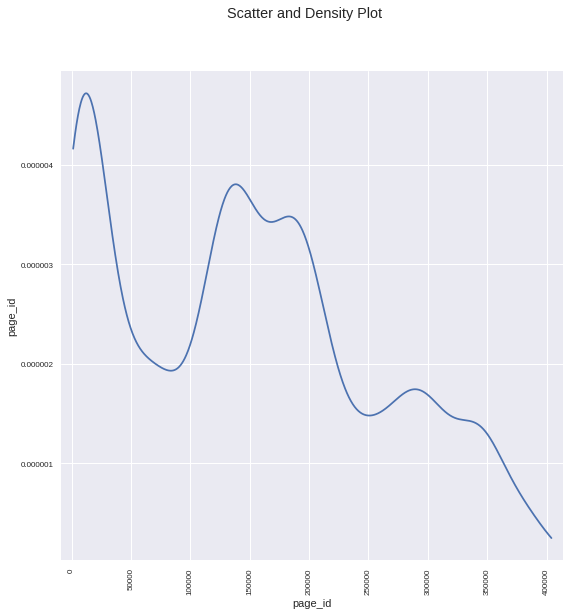

In [51]:
plotScatterMatrix(df1, 9, 10)

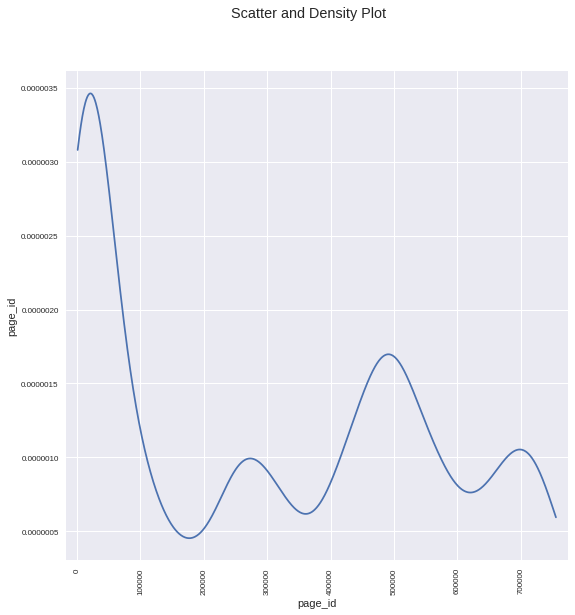

In [56]:
plotScatterMatrix(df2, 9, 10)